In [1]:
import pandas as pd
import numpy as np
from ipynb.fs.defs.Preprocessing_Module import read_data, add_topological, add_landcover, select_columns, reshape_dataset, fillna_dataset
from ipynb.fs.defs.Feature_Expansion_Module import feature_expansion
from ipynb.fs.defs.Initializer_Module import initializer
from ipynb.fs.defs.Neural_Network_Module import FeedforwardNeuralNetModel
from ipynb.fs.defs.Model_Validation_Module import test_model_random_split, train_model_KFold, operational_validation

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)

In [3]:
data = read_data('../Datasets/Greece/GRE_culex_2011_2022.csv')
#=====================================================================
data = data[data.nuts2_name == 'CRETE']
data = data.reset_index(drop=True)
#=====================================================================
columns = ['x', 'y', 'dt_placement',
           'culex spp.', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
           'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
           'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
           'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
           'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
           'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean' ]
names = ['x', 'y', 'dt_placement',
         'mosq_now', 'ndvi', 'ndwi', 'ndmi', 'ndbi',
         'ndvi_mean', 'ndvi_std', 'ndwi_mean', 'ndwi_std', 'ndmi_mean',
         'ndmi_std', 'ndbi_mean', 'ndbi_std', 'lst_day', 'lst_night',
         'acc_rainfall_1week', 'acc_rainfall_2week', 'acc_rainfall_jan',
         'lst_jan_day_mean', 'lst_feb_day_mean', 'lst_mar_day_mean', 'lst_apr_day_mean',
         'lst_jan_night_mean', 'lst_feb_night_mean', 'lst_mar_night_mean', 'lst_apr_night_mean']
data = select_columns(data,columns,names)
data = add_topological(data,'../Datasets/Topological Datasets/2x2grid/greece_2km_geo.csv')
data = add_landcover(data,'../Datasets/Landcover Datasets/2x2grid/greece_2km_lulc.csv')
data = reshape_dataset(data,['x','y','dt_placement'])
data = fillna_dataset(data,{'acc_rainfall_1week':0, 'acc_rainfall_2week':0, 'acc_rainfall_jan':0})

Index(['trap_id', 'station_id', 'x', 'y', 'dt_placement', 'week', 'month',
       'year', 'country_code', 'nuts0_code', 'nuts0_name', 'nuts1_code',
       'nuts1_name', 'nuts2_code', 'nuts2_name', 'nuts3_code', 'nuts3_name',
       'lau1_municipality', 'lau2_settlement', 'trap_type', 'culex spp.',
       'region', 'dt_placement_original', 'indices_image_date', 'indices_lat',
       'indices_lon', 'ndvi', 'ndmi', 'ndwi', 'ndbi', 'ndvi_mean', 'ndmi_mean',
       'ndwi_mean', 'ndbi_mean', 'ndvi_std', 'ndmi_std', 'ndwi_std',
       'ndbi_std', 'lst_image_date', 'lst_lat', 'lst_lon', 'lst_day',
       'lst_night', 'monthly_lst_lat', 'monthly_lst_lon', 'lst_jan_day_mean',
       'lst_jan_night_mean', 'lst_feb_day_mean', 'lst_feb_night_mean',
       'lst_mar_day_mean', 'lst_mar_night_mean', 'lst_apr_day_mean',
       'lst_apr_night_mean', 'indices_image_date.1', 'indices_lat.1',
       'indices_lon.1', 'acc_rainfall_jan', 'dt_placement_minus_7',
       'dt_placement_minus_14', 'dt_placement_m

In [4]:
# set the only_env as True if you want to use only environmental features
only_env = True
# set the case title
case_title = 'NN mosq regression'
# set the exp as True if you want to save the results as csv
exp = False
# set the filepath to export the data
path = '../Resuts/Greece/Crete/'
# set the name of the date column
date_col = 'dt_placement'
# set the model type. Could be 'class_regression' or 'mosquito_regression' or 'classification'
model_type = 'mosquito_regression'
# set the transform argument as True if you want to limit the target variable to 0-9 scale
transform_target = False
#set the data for embeddings e.g. data[['col', 'col2']]
embedded_data = None
#set the transformation actions on the data. Options are 'augmentation', 'normalization', 'log', 'scaling'
transformation_list = ['scaling']

In [5]:
data = feature_expansion(data, env=only_env)

In [6]:
data = initializer(data, model_type, dropna=True)

In [7]:
model = FeedforwardNeuralNetModel(num_features=len(data.iloc[0,:])-2, num_class=1,
                                  hidden_layers = [264,128,128,64,32], model_type=model_type, learning_rate = 0.001,
                                  epochs = 100, batch_size = 128, embedding_data=embedded_data,
                                  dropout=0.2, transformation_list=transformation_list,
                                  early_stop = None, l1_weight=0, l2_weight=0, weights=False)

Epoch 001: | Train Loss: 17.38227 | Val Loss: 22.34953 | Train Acc: 2.410| Val Acc: 2.341
Epoch 002: | Train Loss: 16.27333 | Val Loss: 21.59509 | Train Acc: 2.300| Val Acc: 2.313
Epoch 003: | Train Loss: 14.83334 | Val Loss: 20.02892 | Train Acc: 2.136| Val Acc: 2.245
Epoch 004: | Train Loss: 13.68373 | Val Loss: 18.19939 | Train Acc: 2.111| Val Acc: 2.161
Epoch 005: | Train Loss: 12.70307 | Val Loss: 16.41264 | Train Acc: 2.013| Val Acc: 2.117
Epoch 006: | Train Loss: 11.94792 | Val Loss: 15.13792 | Train Acc: 1.958| Val Acc: 2.150
Epoch 007: | Train Loss: 10.68670 | Val Loss: 14.29406 | Train Acc: 1.846| Val Acc: 2.130
Epoch 008: | Train Loss: 9.98116 | Val Loss: 13.73954 | Train Acc: 1.838| Val Acc: 2.068
Epoch 009: | Train Loss: 9.74409 | Val Loss: 13.43188 | Train Acc: 1.813| Val Acc: 2.081
Epoch 010: | Train Loss: 9.75746 | Val Loss: 13.09109 | Train Acc: 1.823| Val Acc: 2.099
Epoch 011: | Train Loss: 8.93903 | Val Loss: 12.73830 | Train Acc: 1.750| Val Acc: 2.104
Epoch 012: | T

Epoch 093: | Train Loss: 3.53445 | Val Loss: 11.27497 | Train Acc: 1.152| Val Acc: 1.802
Epoch 094: | Train Loss: 3.46112 | Val Loss: 11.44718 | Train Acc: 1.174| Val Acc: 1.834
Epoch 095: | Train Loss: 4.09906 | Val Loss: 11.82667 | Train Acc: 1.226| Val Acc: 1.817
Epoch 096: | Train Loss: 3.28619 | Val Loss: 12.40871 | Train Acc: 1.164| Val Acc: 1.841
Epoch 097: | Train Loss: 3.40443 | Val Loss: 12.61013 | Train Acc: 1.109| Val Acc: 1.845
Epoch 098: | Train Loss: 3.46407 | Val Loss: 12.68282 | Train Acc: 1.142| Val Acc: 1.837
Epoch 099: | Train Loss: 3.88163 | Val Loss: 12.15080 | Train Acc: 1.193| Val Acc: 1.793
Epoch 100: | Train Loss: 3.51498 | Val Loss: 12.23786 | Train Acc: 1.160| Val Acc: 1.842


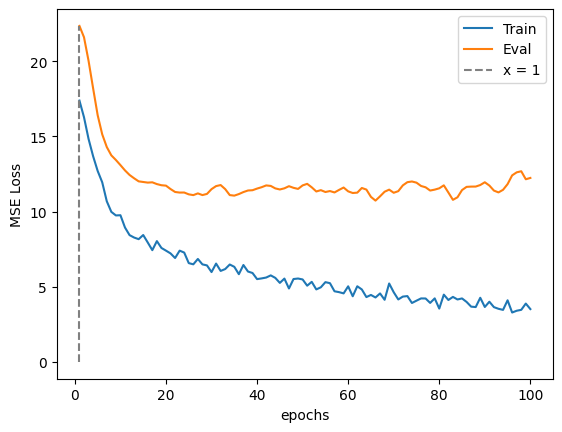

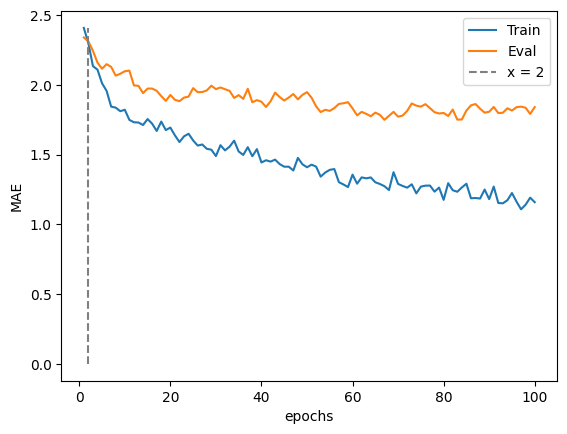

MAE on train set:  0.9723435225618632
min prediction: 0
max prediction: 14

MAE on test set:  1.9166666666666667
Error <= 30: 100.00 %
min prediction: 0
max prediction: 13


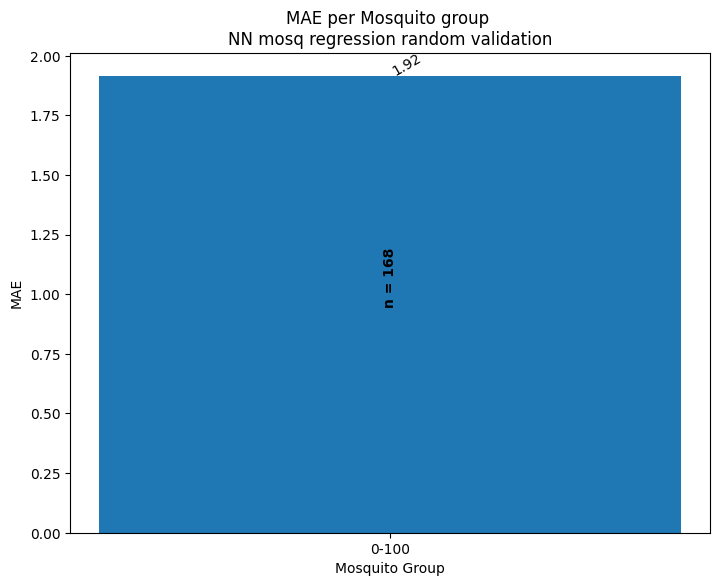

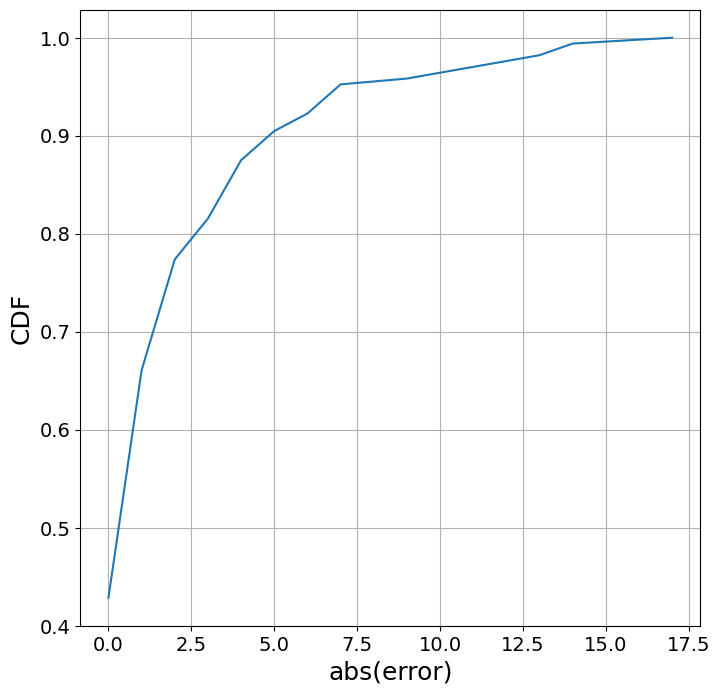

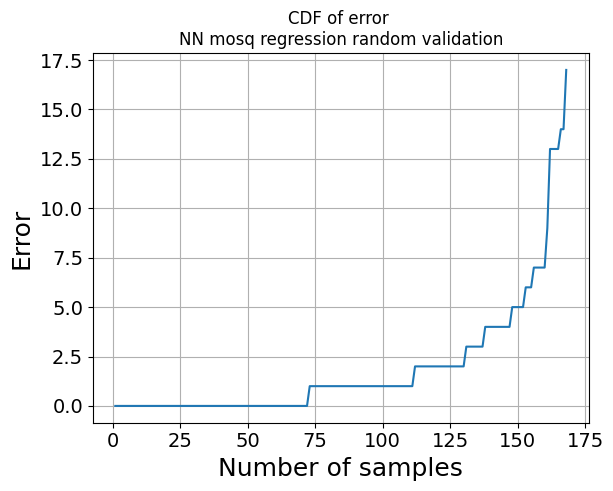

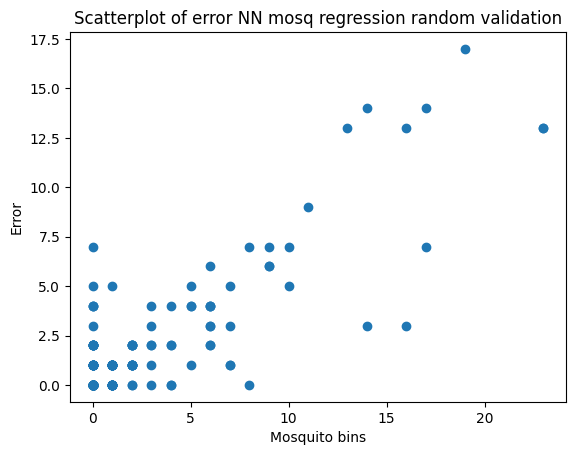

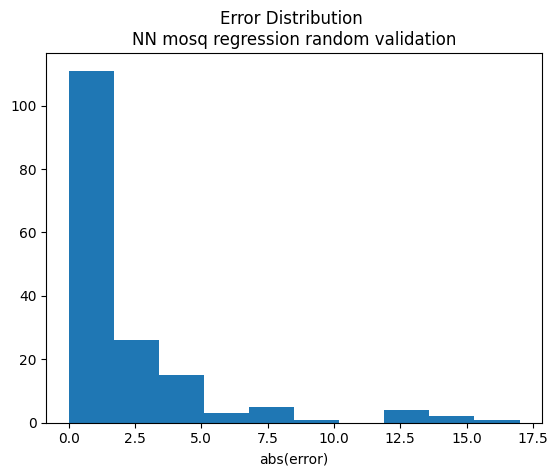

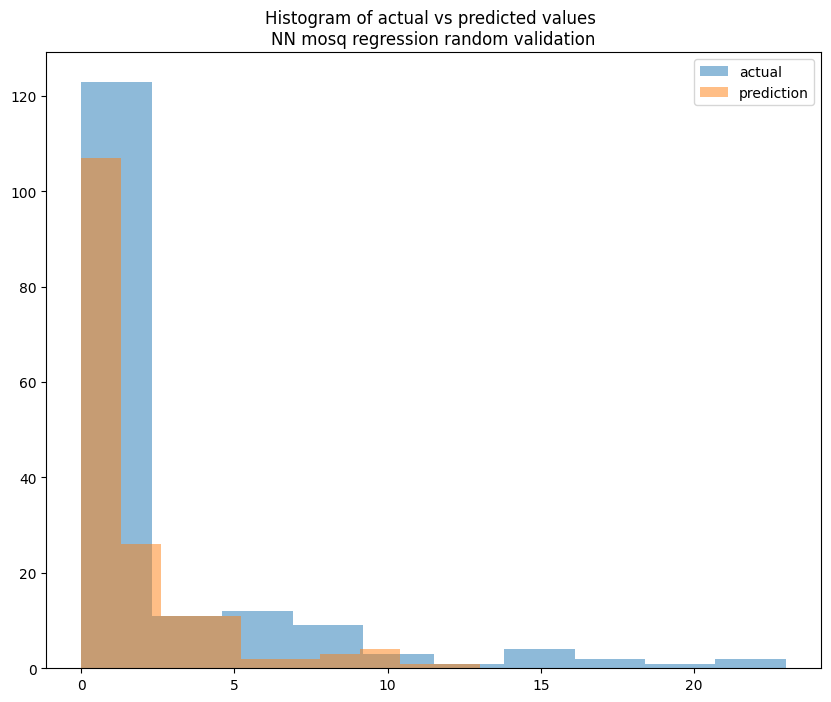

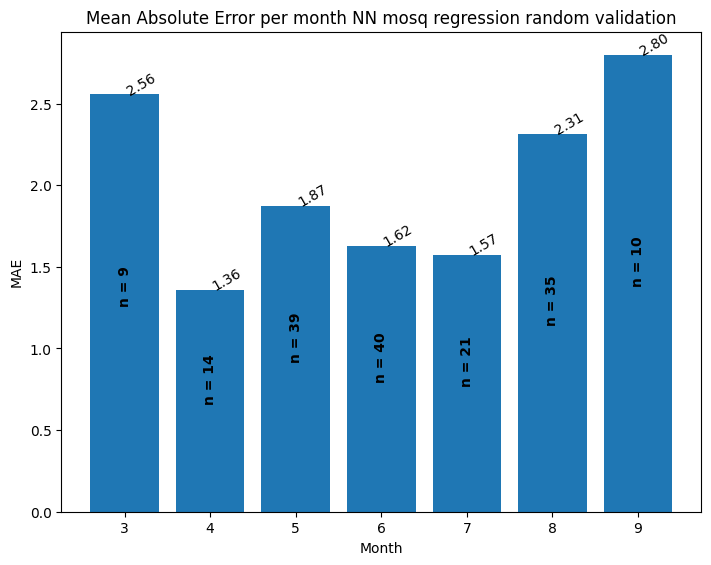

In [8]:
test_model_random_split(data, model, filepath = path, date_col = date_col, case=case_title, export=exp)

Epoch 001: | Train Loss: 18.41914 | Val Loss: 38.18435 | Train Acc: 2.454| Val Acc: 2.718
Epoch 002: | Train Loss: 17.06869 | Val Loss: 36.76638 | Train Acc: 2.401| Val Acc: 2.635
Epoch 003: | Train Loss: 15.42228 | Val Loss: 34.50787 | Train Acc: 2.246| Val Acc: 2.482
Epoch 004: | Train Loss: 14.34441 | Val Loss: 32.14236 | Train Acc: 2.153| Val Acc: 2.376
Epoch 005: | Train Loss: 13.07549 | Val Loss: 30.05817 | Train Acc: 2.113| Val Acc: 2.341
Epoch 006: | Train Loss: 12.32797 | Val Loss: 28.17070 | Train Acc: 2.052| Val Acc: 2.318
Epoch 007: | Train Loss: 11.24449 | Val Loss: 26.81608 | Train Acc: 1.991| Val Acc: 2.294
Epoch 008: | Train Loss: 11.03183 | Val Loss: 25.87501 | Train Acc: 2.005| Val Acc: 2.247
Epoch 009: | Train Loss: 9.89157 | Val Loss: 25.03903 | Train Acc: 1.879| Val Acc: 2.224
Epoch 010: | Train Loss: 9.92400 | Val Loss: 24.75145 | Train Acc: 1.944| Val Acc: 2.212
Epoch 011: | Train Loss: 9.51212 | Val Loss: 24.73411 | Train Acc: 1.868| Val Acc: 2.259
Epoch 012: | 

Epoch 095: | Train Loss: 3.67776 | Val Loss: 24.18764 | Train Acc: 1.215| Val Acc: 2.306
Epoch 096: | Train Loss: 3.77915 | Val Loss: 24.51751 | Train Acc: 1.221| Val Acc: 2.365
Epoch 097: | Train Loss: 3.85476 | Val Loss: 25.38153 | Train Acc: 1.234| Val Acc: 2.376
Epoch 098: | Train Loss: 3.49137 | Val Loss: 25.28075 | Train Acc: 1.176| Val Acc: 2.341
Epoch 099: | Train Loss: 3.38518 | Val Loss: 25.19454 | Train Acc: 1.154| Val Acc: 2.329
Epoch 100: | Train Loss: 3.48947 | Val Loss: 25.55593 | Train Acc: 1.177| Val Acc: 2.435


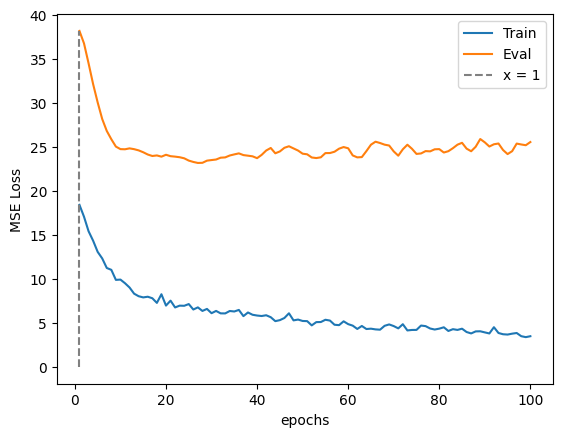

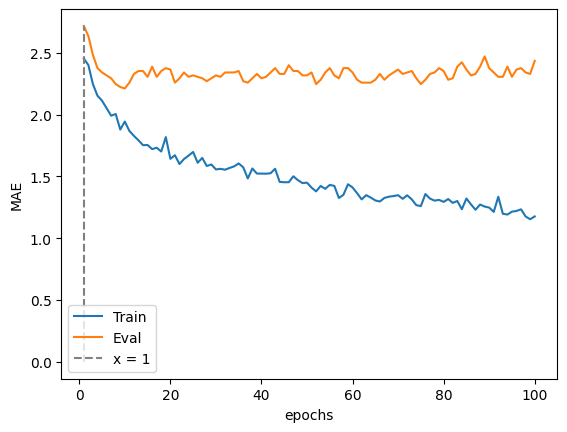

Epoch 001: | Train Loss: 19.50421 | Val Loss: 27.59389 | Train Acc: 2.551| Val Acc: 2.036
Epoch 002: | Train Loss: 18.10224 | Val Loss: 26.83430 | Train Acc: 2.423| Val Acc: 1.917
Epoch 003: | Train Loss: 16.37330 | Val Loss: 25.53643 | Train Acc: 2.292| Val Acc: 1.857
Epoch 004: | Train Loss: 15.22299 | Val Loss: 24.08032 | Train Acc: 2.247| Val Acc: 1.738
Epoch 005: | Train Loss: 14.10106 | Val Loss: 22.78893 | Train Acc: 2.128| Val Acc: 1.643
Epoch 006: | Train Loss: 13.08932 | Val Loss: 21.94444 | Train Acc: 2.101| Val Acc: 1.738
Epoch 007: | Train Loss: 12.42628 | Val Loss: 21.50014 | Train Acc: 2.091| Val Acc: 1.762
Epoch 008: | Train Loss: 11.60271 | Val Loss: 21.13367 | Train Acc: 2.032| Val Acc: 1.774
Epoch 009: | Train Loss: 10.34630 | Val Loss: 20.94163 | Train Acc: 1.927| Val Acc: 1.845
Epoch 010: | Train Loss: 10.16709 | Val Loss: 20.76383 | Train Acc: 1.906| Val Acc: 1.857
Epoch 011: | Train Loss: 9.91779 | Val Loss: 20.66060 | Train Acc: 1.915| Val Acc: 1.845
Epoch 012: 

Epoch 093: | Train Loss: 3.76570 | Val Loss: 22.06316 | Train Acc: 1.248| Val Acc: 2.167
Epoch 094: | Train Loss: 4.08765 | Val Loss: 22.07801 | Train Acc: 1.273| Val Acc: 2.190
Epoch 095: | Train Loss: 4.05577 | Val Loss: 22.01993 | Train Acc: 1.235| Val Acc: 2.190
Epoch 096: | Train Loss: 4.15784 | Val Loss: 21.55408 | Train Acc: 1.266| Val Acc: 2.155
Epoch 097: | Train Loss: 3.71664 | Val Loss: 21.66275 | Train Acc: 1.163| Val Acc: 2.143
Epoch 098: | Train Loss: 4.36328 | Val Loss: 21.89540 | Train Acc: 1.284| Val Acc: 2.155
Epoch 099: | Train Loss: 4.11765 | Val Loss: 21.95396 | Train Acc: 1.280| Val Acc: 2.131
Epoch 100: | Train Loss: 4.06166 | Val Loss: 21.57878 | Train Acc: 1.239| Val Acc: 2.024


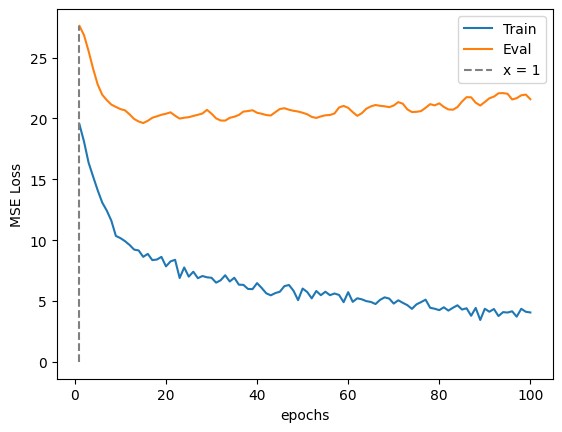

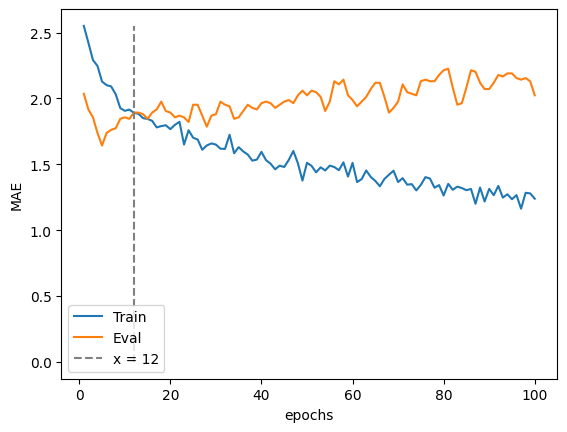

Epoch 001: | Train Loss: 18.45112 | Val Loss: 52.54512 | Train Acc: 2.485| Val Acc: 3.143
Epoch 002: | Train Loss: 17.19445 | Val Loss: 50.91393 | Train Acc: 2.318| Val Acc: 3.083
Epoch 003: | Train Loss: 16.22098 | Val Loss: 48.66473 | Train Acc: 2.270| Val Acc: 3.095
Epoch 004: | Train Loss: 14.71439 | Val Loss: 46.12012 | Train Acc: 2.211| Val Acc: 3.012
Epoch 005: | Train Loss: 13.64771 | Val Loss: 43.72186 | Train Acc: 2.122| Val Acc: 2.917
Epoch 006: | Train Loss: 12.52425 | Val Loss: 41.49514 | Train Acc: 2.057| Val Acc: 2.893
Epoch 007: | Train Loss: 11.48001 | Val Loss: 39.84781 | Train Acc: 1.999| Val Acc: 2.881
Epoch 008: | Train Loss: 10.79846 | Val Loss: 38.79829 | Train Acc: 1.892| Val Acc: 2.869
Epoch 009: | Train Loss: 10.76842 | Val Loss: 38.17245 | Train Acc: 1.960| Val Acc: 2.833
Epoch 010: | Train Loss: 10.15483 | Val Loss: 37.71518 | Train Acc: 1.917| Val Acc: 2.810
Epoch 011: | Train Loss: 9.96798 | Val Loss: 37.55216 | Train Acc: 1.887| Val Acc: 2.833
Epoch 012: 

Epoch 095: | Train Loss: 3.97437 | Val Loss: 37.04121 | Train Acc: 1.195| Val Acc: 2.893
Epoch 096: | Train Loss: 3.69595 | Val Loss: 36.91024 | Train Acc: 1.192| Val Acc: 2.929
Epoch 097: | Train Loss: 3.89941 | Val Loss: 36.68697 | Train Acc: 1.217| Val Acc: 2.940
Epoch 098: | Train Loss: 4.11941 | Val Loss: 36.85175 | Train Acc: 1.245| Val Acc: 2.929
Epoch 099: | Train Loss: 3.84922 | Val Loss: 36.75894 | Train Acc: 1.236| Val Acc: 2.905
Epoch 100: | Train Loss: 3.93767 | Val Loss: 36.81170 | Train Acc: 1.213| Val Acc: 2.917


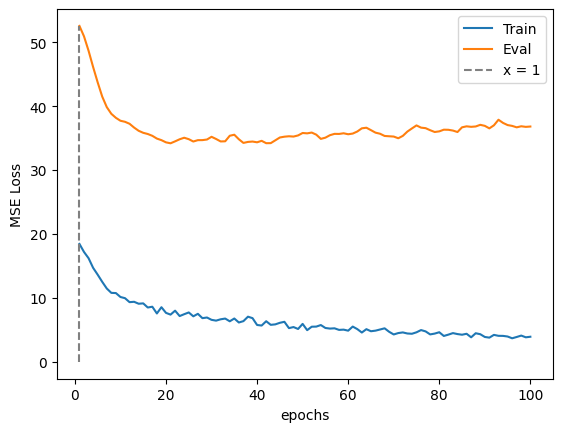

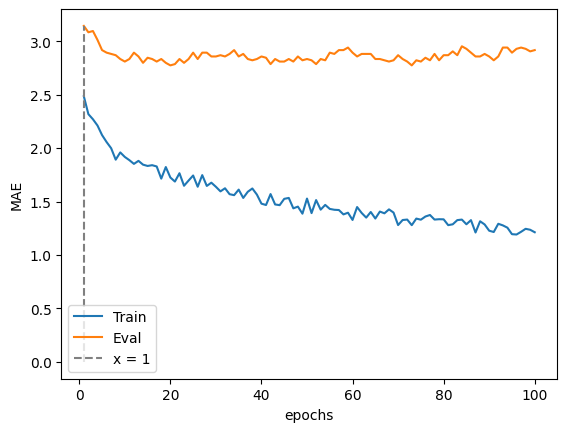

Epoch 001: | Train Loss: 18.56561 | Val Loss: 28.34089 | Train Acc: 2.472| Val Acc: 2.321
Epoch 002: | Train Loss: 17.50281 | Val Loss: 27.24890 | Train Acc: 2.392| Val Acc: 2.310
Epoch 003: | Train Loss: 15.69208 | Val Loss: 25.05563 | Train Acc: 2.248| Val Acc: 2.167
Epoch 004: | Train Loss: 14.56248 | Val Loss: 22.52365 | Train Acc: 2.178| Val Acc: 2.083
Epoch 005: | Train Loss: 13.58817 | Val Loss: 20.34151 | Train Acc: 2.122| Val Acc: 1.929
Epoch 006: | Train Loss: 12.57643 | Val Loss: 18.68917 | Train Acc: 2.076| Val Acc: 1.917
Epoch 007: | Train Loss: 12.01230 | Val Loss: 17.48822 | Train Acc: 2.025| Val Acc: 1.893
Epoch 008: | Train Loss: 10.88534 | Val Loss: 16.66473 | Train Acc: 1.950| Val Acc: 1.857
Epoch 009: | Train Loss: 10.49798 | Val Loss: 15.90541 | Train Acc: 1.943| Val Acc: 1.857
Epoch 010: | Train Loss: 9.94405 | Val Loss: 15.12230 | Train Acc: 1.912| Val Acc: 1.810
Epoch 011: | Train Loss: 9.01115 | Val Loss: 14.43639 | Train Acc: 1.819| Val Acc: 1.857
Epoch 012: |

Epoch 093: | Train Loss: 4.44104 | Val Loss: 12.61883 | Train Acc: 1.275| Val Acc: 1.929
Epoch 094: | Train Loss: 4.18731 | Val Loss: 13.06021 | Train Acc: 1.240| Val Acc: 1.988
Epoch 095: | Train Loss: 3.65281 | Val Loss: 13.08879 | Train Acc: 1.226| Val Acc: 2.000
Epoch 096: | Train Loss: 3.75239 | Val Loss: 13.21415 | Train Acc: 1.202| Val Acc: 2.048
Epoch 097: | Train Loss: 4.05212 | Val Loss: 13.33133 | Train Acc: 1.250| Val Acc: 2.083
Epoch 098: | Train Loss: 4.04226 | Val Loss: 13.45718 | Train Acc: 1.295| Val Acc: 2.000
Epoch 099: | Train Loss: 4.05643 | Val Loss: 13.48134 | Train Acc: 1.238| Val Acc: 2.048
Epoch 100: | Train Loss: 3.87318 | Val Loss: 13.34729 | Train Acc: 1.223| Val Acc: 2.060


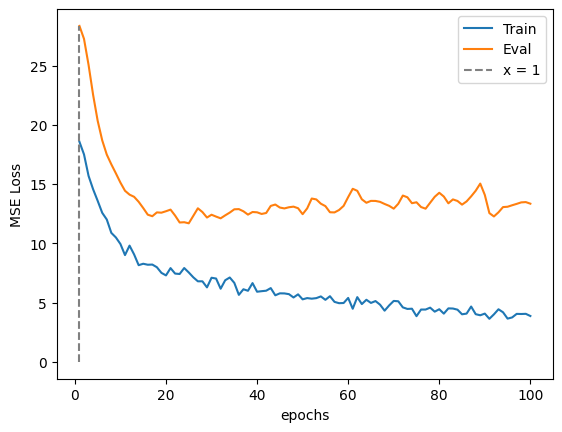

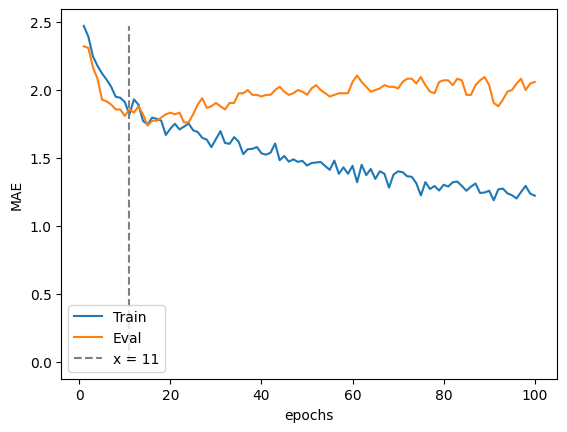

Epoch 001: | Train Loss: 18.35022 | Val Loss: 33.43774 | Train Acc: 2.389| Val Acc: 2.940
Epoch 002: | Train Loss: 16.79604 | Val Loss: 32.39375 | Train Acc: 2.291| Val Acc: 2.893
Epoch 003: | Train Loss: 15.46773 | Val Loss: 30.18621 | Train Acc: 2.238| Val Acc: 2.762
Epoch 004: | Train Loss: 14.31160 | Val Loss: 27.74250 | Train Acc: 2.134| Val Acc: 2.583
Epoch 005: | Train Loss: 13.12255 | Val Loss: 26.12943 | Train Acc: 2.074| Val Acc: 2.607
Epoch 006: | Train Loss: 11.93240 | Val Loss: 24.94503 | Train Acc: 2.015| Val Acc: 2.583
Epoch 007: | Train Loss: 11.41553 | Val Loss: 24.26075 | Train Acc: 1.951| Val Acc: 2.571
Epoch 008: | Train Loss: 10.58418 | Val Loss: 23.75579 | Train Acc: 1.905| Val Acc: 2.536
Epoch 009: | Train Loss: 9.92660 | Val Loss: 23.57857 | Train Acc: 1.872| Val Acc: 2.536
Epoch 010: | Train Loss: 9.76431 | Val Loss: 23.44528 | Train Acc: 1.883| Val Acc: 2.560
Epoch 011: | Train Loss: 9.08041 | Val Loss: 23.40557 | Train Acc: 1.815| Val Acc: 2.548
Epoch 012: | 

Epoch 096: | Train Loss: 3.58848 | Val Loss: 28.44066 | Train Acc: 1.205| Val Acc: 2.810
Epoch 097: | Train Loss: 3.67776 | Val Loss: 28.23832 | Train Acc: 1.189| Val Acc: 2.821
Epoch 098: | Train Loss: 3.56616 | Val Loss: 28.55111 | Train Acc: 1.187| Val Acc: 2.762
Epoch 099: | Train Loss: 3.72856 | Val Loss: 29.53693 | Train Acc: 1.220| Val Acc: 2.833
Epoch 100: | Train Loss: 3.28877 | Val Loss: 29.21831 | Train Acc: 1.156| Val Acc: 2.821


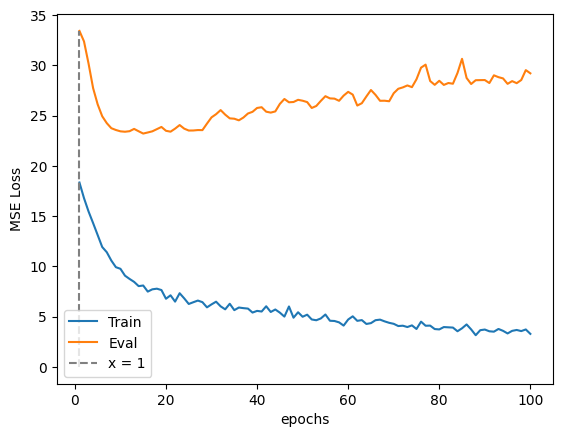

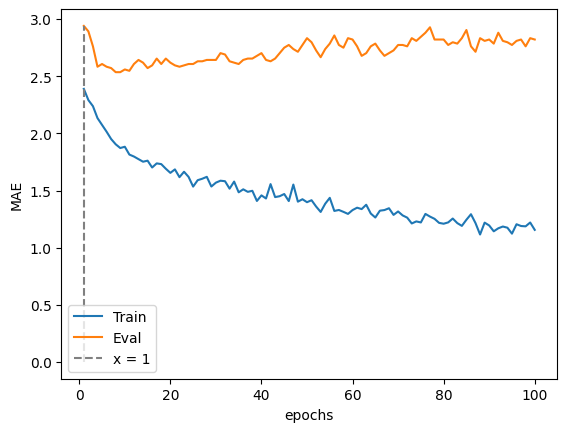

Epoch 001: | Train Loss: 18.66658 | Val Loss: 23.76557 | Train Acc: 2.466| Val Acc: 2.345
Epoch 002: | Train Loss: 17.26160 | Val Loss: 22.82409 | Train Acc: 2.356| Val Acc: 2.286
Epoch 003: | Train Loss: 15.88637 | Val Loss: 21.19741 | Train Acc: 2.295| Val Acc: 2.250
Epoch 004: | Train Loss: 15.00004 | Val Loss: 19.56431 | Train Acc: 2.203| Val Acc: 2.131
Epoch 005: | Train Loss: 13.50586 | Val Loss: 18.20390 | Train Acc: 2.107| Val Acc: 2.107
Epoch 006: | Train Loss: 12.80256 | Val Loss: 17.09804 | Train Acc: 2.041| Val Acc: 2.000
Epoch 007: | Train Loss: 12.16243 | Val Loss: 15.94596 | Train Acc: 2.030| Val Acc: 2.036
Epoch 008: | Train Loss: 10.80610 | Val Loss: 14.97840 | Train Acc: 1.942| Val Acc: 2.036
Epoch 009: | Train Loss: 10.45181 | Val Loss: 14.44626 | Train Acc: 1.925| Val Acc: 2.048
Epoch 010: | Train Loss: 9.90161 | Val Loss: 14.35425 | Train Acc: 1.899| Val Acc: 2.060
Epoch 011: | Train Loss: 9.45944 | Val Loss: 14.33275 | Train Acc: 1.822| Val Acc: 2.083
Epoch 012: |

Epoch 094: | Train Loss: 3.48016 | Val Loss: 13.62062 | Train Acc: 1.206| Val Acc: 1.988
Epoch 095: | Train Loss: 3.49107 | Val Loss: 13.56992 | Train Acc: 1.180| Val Acc: 1.952
Epoch 096: | Train Loss: 4.35354 | Val Loss: 13.79245 | Train Acc: 1.256| Val Acc: 1.940
Epoch 097: | Train Loss: 3.65608 | Val Loss: 13.98620 | Train Acc: 1.241| Val Acc: 2.000
Epoch 098: | Train Loss: 3.99126 | Val Loss: 14.06032 | Train Acc: 1.249| Val Acc: 2.000
Epoch 099: | Train Loss: 4.02942 | Val Loss: 13.54861 | Train Acc: 1.279| Val Acc: 1.976
Epoch 100: | Train Loss: 3.75667 | Val Loss: 13.38246 | Train Acc: 1.197| Val Acc: 1.988


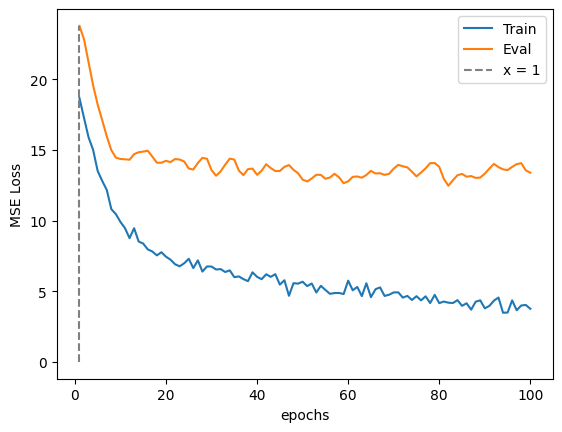

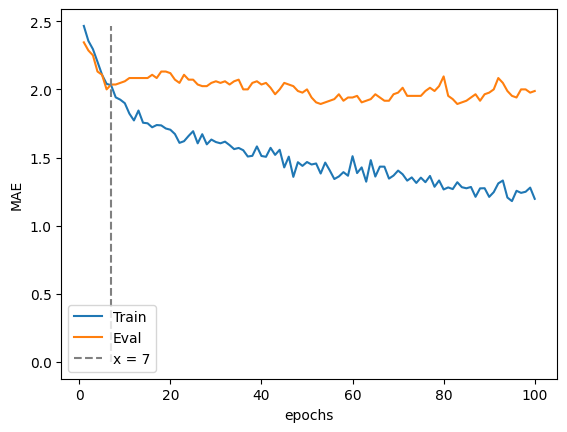

Epoch 001: | Train Loss: 18.46277 | Val Loss: 21.92220 | Train Acc: 2.428| Val Acc: 2.429
Epoch 002: | Train Loss: 17.06939 | Val Loss: 21.35543 | Train Acc: 2.348| Val Acc: 2.357
Epoch 003: | Train Loss: 15.70012 | Val Loss: 19.84756 | Train Acc: 2.265| Val Acc: 2.262
Epoch 004: | Train Loss: 14.27419 | Val Loss: 17.93824 | Train Acc: 2.144| Val Acc: 2.155
Epoch 005: | Train Loss: 13.34836 | Val Loss: 16.25235 | Train Acc: 2.091| Val Acc: 2.000
Epoch 006: | Train Loss: 12.39850 | Val Loss: 14.91608 | Train Acc: 2.043| Val Acc: 1.952
Epoch 007: | Train Loss: 11.29430 | Val Loss: 13.87709 | Train Acc: 1.992| Val Acc: 1.869
Epoch 008: | Train Loss: 11.17797 | Val Loss: 13.19846 | Train Acc: 1.983| Val Acc: 1.833
Epoch 009: | Train Loss: 10.29440 | Val Loss: 12.71019 | Train Acc: 1.926| Val Acc: 1.786
Epoch 010: | Train Loss: 10.22082 | Val Loss: 12.37264 | Train Acc: 1.916| Val Acc: 1.786
Epoch 011: | Train Loss: 9.80794 | Val Loss: 12.07179 | Train Acc: 1.886| Val Acc: 1.798
Epoch 012: 

Epoch 094: | Train Loss: 3.97371 | Val Loss: 10.05522 | Train Acc: 1.281| Val Acc: 1.833
Epoch 095: | Train Loss: 4.12305 | Val Loss: 9.74549 | Train Acc: 1.243| Val Acc: 1.762
Epoch 096: | Train Loss: 3.98849 | Val Loss: 9.47086 | Train Acc: 1.255| Val Acc: 1.738
Epoch 097: | Train Loss: 3.85506 | Val Loss: 9.89984 | Train Acc: 1.213| Val Acc: 1.833
Epoch 098: | Train Loss: 3.80611 | Val Loss: 10.45913 | Train Acc: 1.213| Val Acc: 1.857
Epoch 099: | Train Loss: 4.13527 | Val Loss: 11.04539 | Train Acc: 1.245| Val Acc: 1.881
Epoch 100: | Train Loss: 4.12561 | Val Loss: 11.22151 | Train Acc: 1.277| Val Acc: 1.893


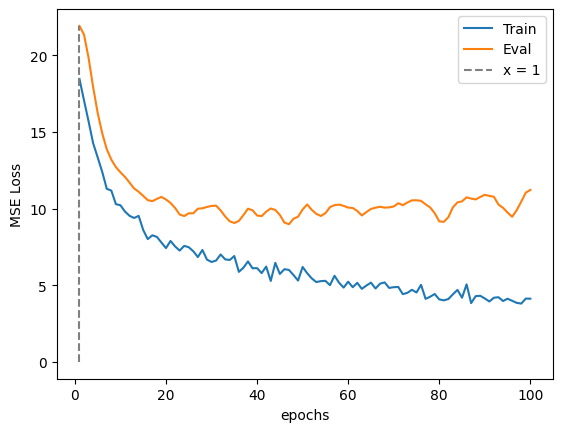

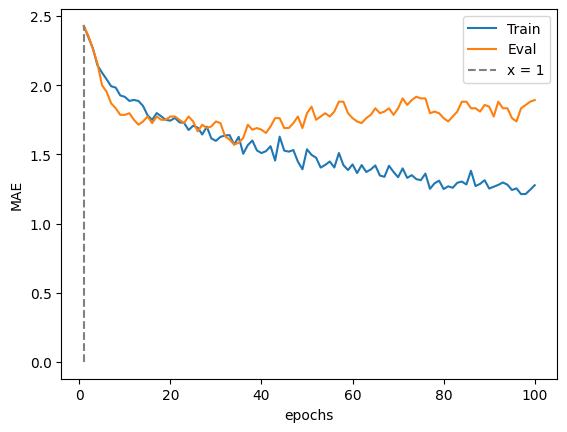

Epoch 001: | Train Loss: 18.11470 | Val Loss: 25.62547 | Train Acc: 2.414| Val Acc: 2.976
Epoch 002: | Train Loss: 16.81361 | Val Loss: 24.71721 | Train Acc: 2.316| Val Acc: 2.929
Epoch 003: | Train Loss: 15.67680 | Val Loss: 22.69758 | Train Acc: 2.223| Val Acc: 2.810
Epoch 004: | Train Loss: 14.33133 | Val Loss: 20.13186 | Train Acc: 2.131| Val Acc: 2.583
Epoch 005: | Train Loss: 13.62686 | Val Loss: 17.65717 | Train Acc: 2.111| Val Acc: 2.417
Epoch 006: | Train Loss: 12.56198 | Val Loss: 15.72094 | Train Acc: 1.993| Val Acc: 2.262
Epoch 007: | Train Loss: 11.12300 | Val Loss: 13.91592 | Train Acc: 1.945| Val Acc: 2.167
Epoch 008: | Train Loss: 11.51854 | Val Loss: 12.69349 | Train Acc: 1.994| Val Acc: 2.071
Epoch 009: | Train Loss: 9.98715 | Val Loss: 11.97476 | Train Acc: 1.841| Val Acc: 2.107
Epoch 010: | Train Loss: 10.16375 | Val Loss: 11.62152 | Train Acc: 1.900| Val Acc: 1.988
Epoch 011: | Train Loss: 9.41659 | Val Loss: 11.41099 | Train Acc: 1.828| Val Acc: 2.024
Epoch 012: |

Epoch 095: | Train Loss: 3.68549 | Val Loss: 10.01259 | Train Acc: 1.221| Val Acc: 1.786
Epoch 096: | Train Loss: 3.77604 | Val Loss: 10.19908 | Train Acc: 1.226| Val Acc: 1.869
Epoch 097: | Train Loss: 4.39420 | Val Loss: 10.55523 | Train Acc: 1.321| Val Acc: 1.905
Epoch 098: | Train Loss: 4.42063 | Val Loss: 10.74969 | Train Acc: 1.269| Val Acc: 1.952
Epoch 099: | Train Loss: 4.29894 | Val Loss: 10.57516 | Train Acc: 1.309| Val Acc: 2.036
Epoch 100: | Train Loss: 3.73314 | Val Loss: 10.31088 | Train Acc: 1.246| Val Acc: 1.976


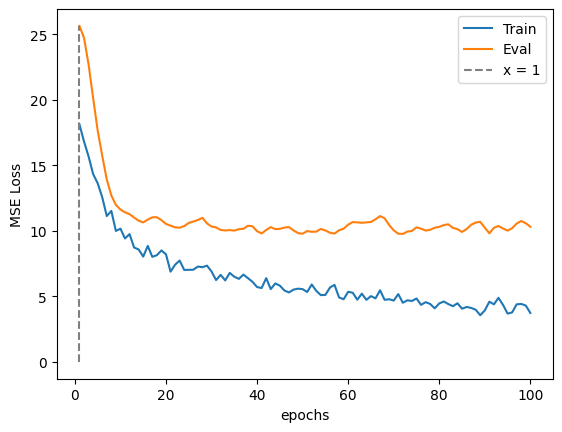

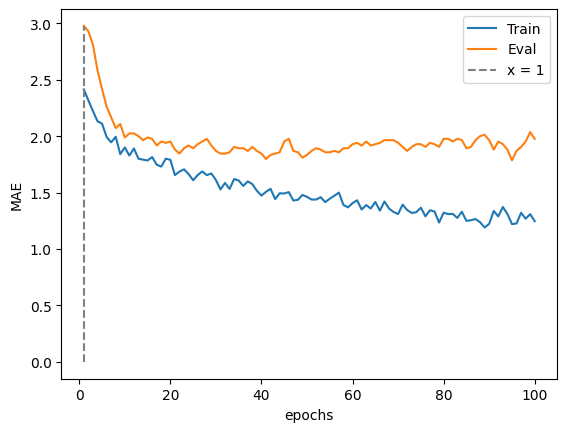

Epoch 001: | Train Loss: 16.11612 | Val Loss: 53.94185 | Train Acc: 2.292| Val Acc: 4.000
Epoch 002: | Train Loss: 14.87418 | Val Loss: 52.08425 | Train Acc: 2.193| Val Acc: 3.905
Epoch 003: | Train Loss: 13.56464 | Val Loss: 48.44936 | Train Acc: 2.053| Val Acc: 3.702
Epoch 004: | Train Loss: 12.39843 | Val Loss: 44.82240 | Train Acc: 2.036| Val Acc: 3.571
Epoch 005: | Train Loss: 11.53548 | Val Loss: 40.51720 | Train Acc: 1.963| Val Acc: 3.369
Epoch 006: | Train Loss: 10.80153 | Val Loss: 36.65619 | Train Acc: 1.931| Val Acc: 3.202
Epoch 007: | Train Loss: 10.26596 | Val Loss: 33.91573 | Train Acc: 1.898| Val Acc: 3.083
Epoch 008: | Train Loss: 9.81924 | Val Loss: 31.79522 | Train Acc: 1.852| Val Acc: 2.940
Epoch 009: | Train Loss: 9.02780 | Val Loss: 30.65325 | Train Acc: 1.824| Val Acc: 2.893
Epoch 010: | Train Loss: 8.72499 | Val Loss: 29.78249 | Train Acc: 1.772| Val Acc: 2.881
Epoch 011: | Train Loss: 8.77644 | Val Loss: 29.11919 | Train Acc: 1.799| Val Acc: 2.881
Epoch 012: | T

Epoch 094: | Train Loss: 3.67606 | Val Loss: 30.31885 | Train Acc: 1.189| Val Acc: 2.810
Epoch 095: | Train Loss: 3.37380 | Val Loss: 30.15252 | Train Acc: 1.152| Val Acc: 2.798
Epoch 096: | Train Loss: 3.61050 | Val Loss: 29.60184 | Train Acc: 1.193| Val Acc: 2.798
Epoch 097: | Train Loss: 3.45623 | Val Loss: 29.18270 | Train Acc: 1.176| Val Acc: 2.786
Epoch 098: | Train Loss: 3.68836 | Val Loss: 29.48692 | Train Acc: 1.159| Val Acc: 2.786
Epoch 099: | Train Loss: 3.11842 | Val Loss: 29.86641 | Train Acc: 1.133| Val Acc: 2.786
Epoch 100: | Train Loss: 3.22880 | Val Loss: 29.68056 | Train Acc: 1.158| Val Acc: 2.738


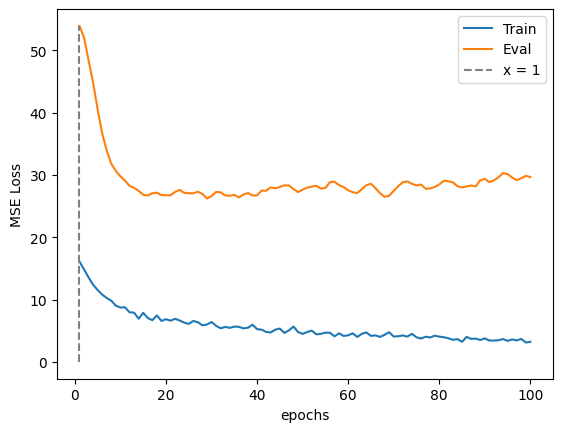

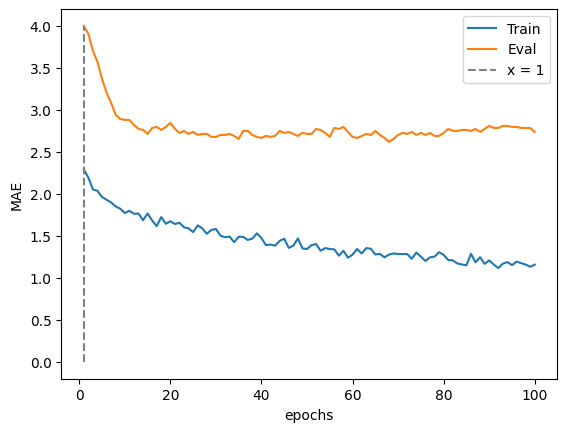

Epoch 001: | Train Loss: 18.32179 | Val Loss: 29.55829 | Train Acc: 2.486| Val Acc: 2.821
Epoch 002: | Train Loss: 16.89912 | Val Loss: 28.62437 | Train Acc: 2.316| Val Acc: 2.786
Epoch 003: | Train Loss: 15.64194 | Val Loss: 26.82038 | Train Acc: 2.245| Val Acc: 2.690
Epoch 004: | Train Loss: 14.54435 | Val Loss: 24.47577 | Train Acc: 2.166| Val Acc: 2.548
Epoch 005: | Train Loss: 13.37709 | Val Loss: 21.84263 | Train Acc: 2.098| Val Acc: 2.512
Epoch 006: | Train Loss: 12.74878 | Val Loss: 19.56722 | Train Acc: 2.048| Val Acc: 2.405
Epoch 007: | Train Loss: 11.83576 | Val Loss: 18.21156 | Train Acc: 2.012| Val Acc: 2.393
Epoch 008: | Train Loss: 11.04593 | Val Loss: 16.87641 | Train Acc: 2.004| Val Acc: 2.345
Epoch 009: | Train Loss: 9.97634 | Val Loss: 15.70657 | Train Acc: 1.897| Val Acc: 2.345
Epoch 010: | Train Loss: 9.92622 | Val Loss: 14.93760 | Train Acc: 1.913| Val Acc: 2.286
Epoch 011: | Train Loss: 9.62267 | Val Loss: 14.58088 | Train Acc: 1.853| Val Acc: 2.274
Epoch 012: | 

Epoch 095: | Train Loss: 4.33353 | Val Loss: 13.51143 | Train Acc: 1.310| Val Acc: 1.976
Epoch 096: | Train Loss: 3.71471 | Val Loss: 13.42054 | Train Acc: 1.216| Val Acc: 2.024
Epoch 097: | Train Loss: 3.96970 | Val Loss: 12.78868 | Train Acc: 1.262| Val Acc: 2.060
Epoch 098: | Train Loss: 4.17461 | Val Loss: 12.44736 | Train Acc: 1.252| Val Acc: 2.107
Epoch 099: | Train Loss: 4.04726 | Val Loss: 12.59003 | Train Acc: 1.241| Val Acc: 2.119
Epoch 100: | Train Loss: 4.05537 | Val Loss: 12.92217 | Train Acc: 1.246| Val Acc: 2.036


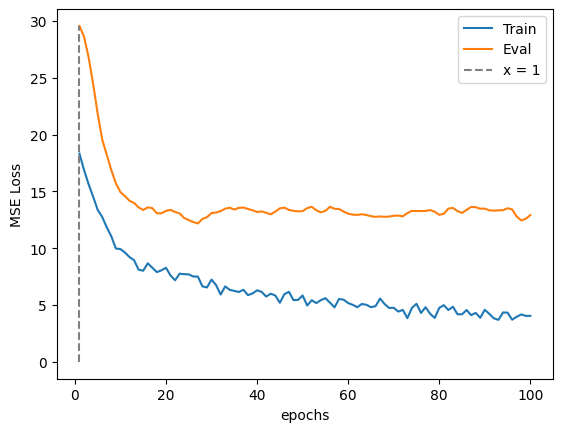

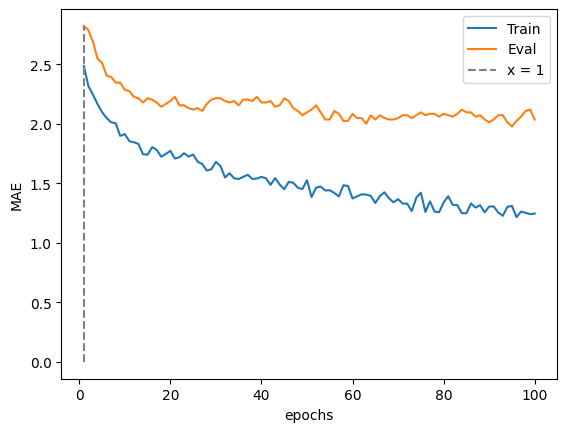

MAE on train set:  0.9562689919408112
min prediction: 0
max prediction: 17

MAE on test set:  2.2889417360285376
Error <= 30: 99.76 %
min prediction: 0
max prediction: 16


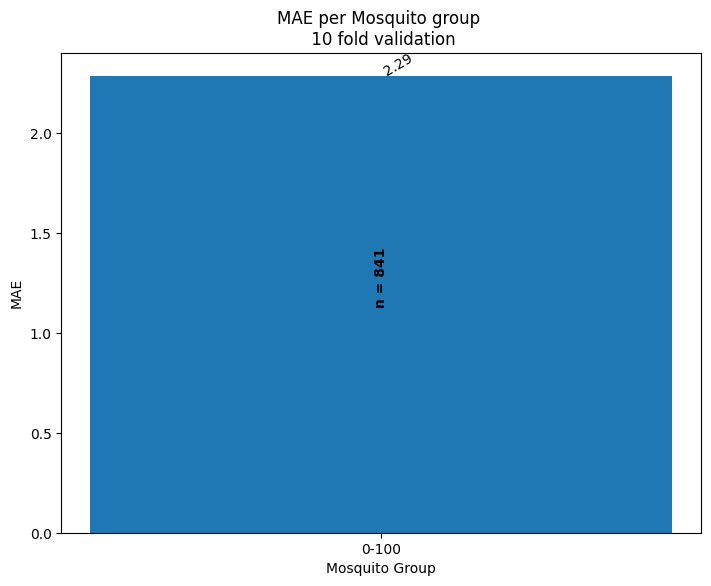

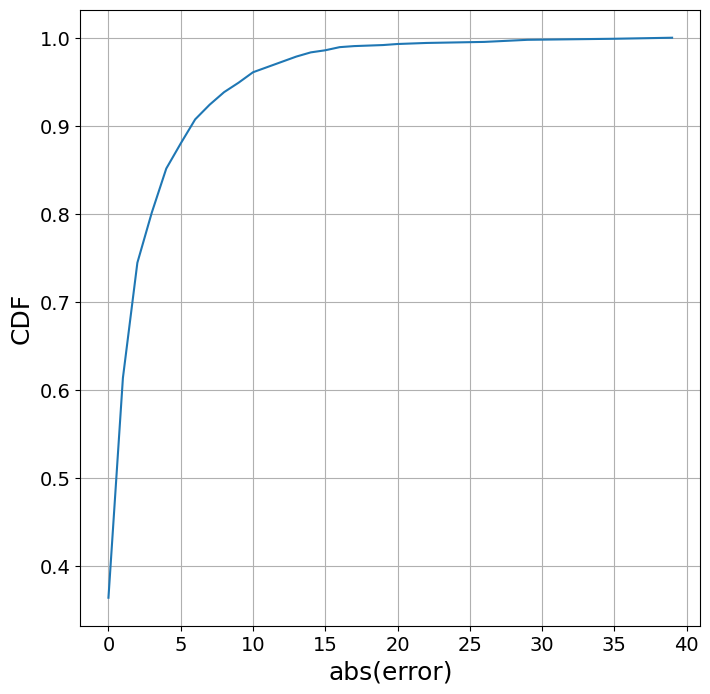

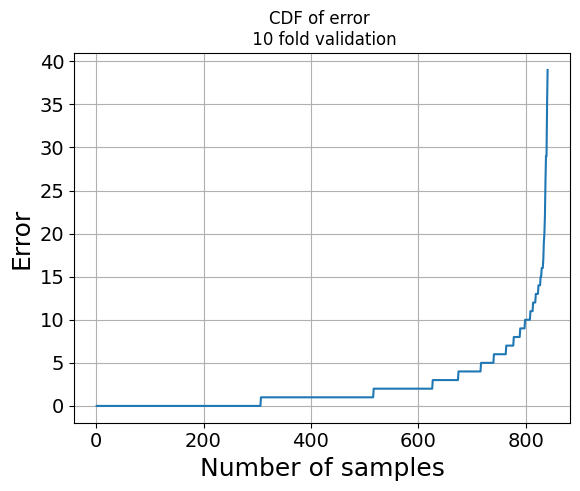

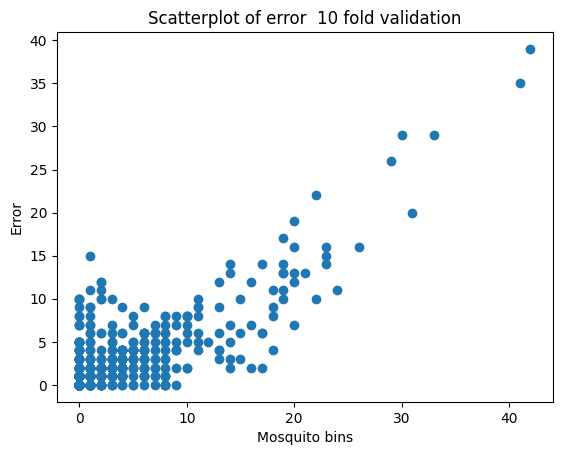

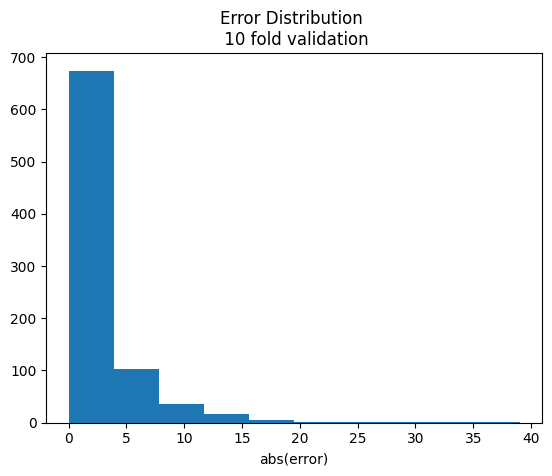

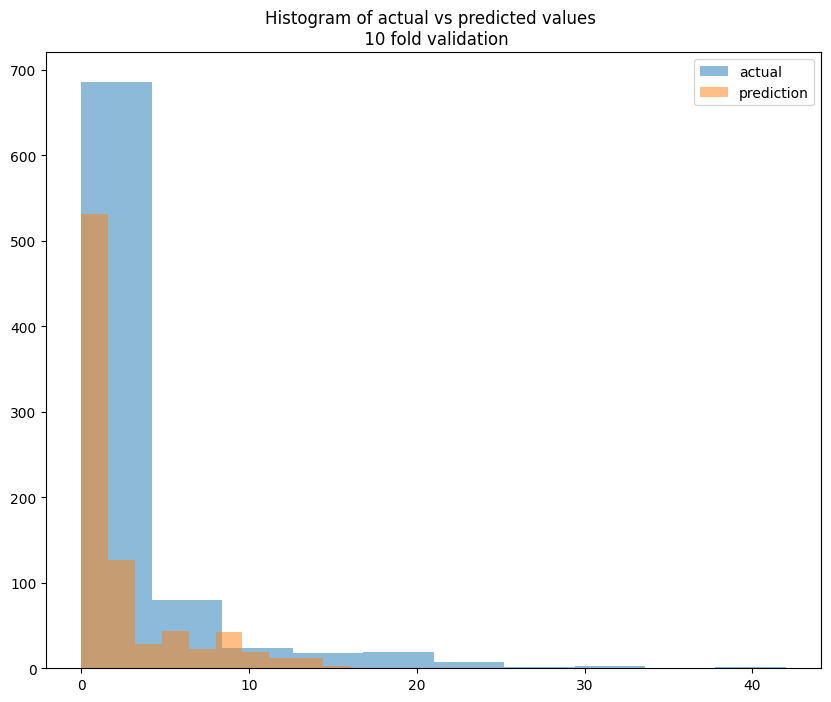

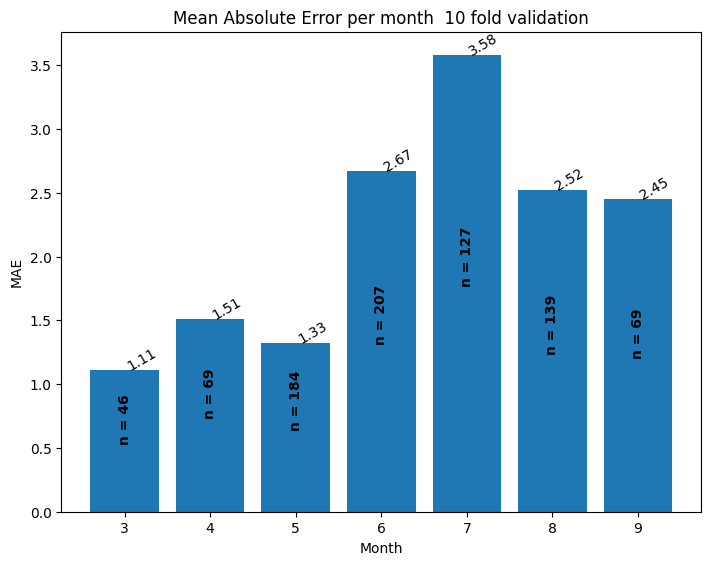

In [9]:
train_model_KFold(data, model, date_col='dt_placement', case='')

Epoch 001: | Train Loss: 19.93697 | Val Loss: 3.32007 | Train Acc: 2.417| Val Acc: 1.471
Epoch 002: | Train Loss: 18.50622 | Val Loss: 0.90341 | Train Acc: 2.384| Val Acc: 0.647
Epoch 003: | Train Loss: 17.15925 | Val Loss: 0.41906 | Train Acc: 2.288| Val Acc: 0.294
Epoch 004: | Train Loss: 16.72195 | Val Loss: 0.27901 | Train Acc: 2.266| Val Acc: 0.294
Epoch 005: | Train Loss: 15.24909 | Val Loss: 0.53130 | Train Acc: 2.151| Val Acc: 0.529
Epoch 006: | Train Loss: 14.38598 | Val Loss: 1.00325 | Train Acc: 2.143| Val Acc: 0.647
Epoch 007: | Train Loss: 12.91955 | Val Loss: 1.48244 | Train Acc: 2.011| Val Acc: 0.706
Epoch 008: | Train Loss: 12.16124 | Val Loss: 1.57520 | Train Acc: 1.993| Val Acc: 0.706
Epoch 009: | Train Loss: 10.89058 | Val Loss: 1.68402 | Train Acc: 1.881| Val Acc: 0.706
Epoch 010: | Train Loss: 11.62567 | Val Loss: 1.92629 | Train Acc: 1.962| Val Acc: 0.824
Epoch 011: | Train Loss: 10.03211 | Val Loss: 1.96856 | Train Acc: 1.874| Val Acc: 0.765
Epoch 012: | Train Lo

Epoch 097: | Train Loss: 3.70599 | Val Loss: 0.00000 | Train Acc: 1.190| Val Acc: 0.000
Epoch 098: | Train Loss: 3.72639 | Val Loss: 0.00000 | Train Acc: 1.209| Val Acc: 0.000
Epoch 099: | Train Loss: 3.76362 | Val Loss: 0.00000 | Train Acc: 1.205| Val Acc: 0.000
Epoch 100: | Train Loss: 3.44517 | Val Loss: 0.00000 | Train Acc: 1.119| Val Acc: 0.000


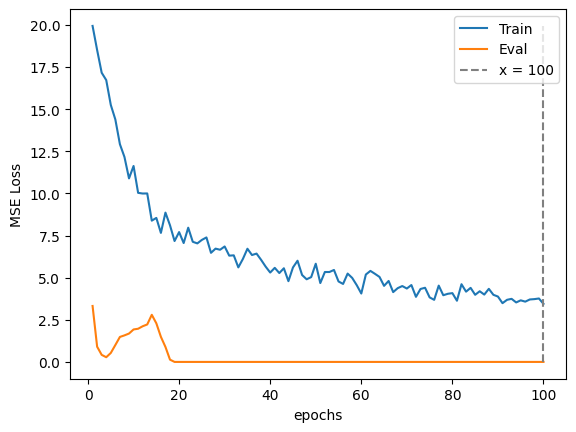

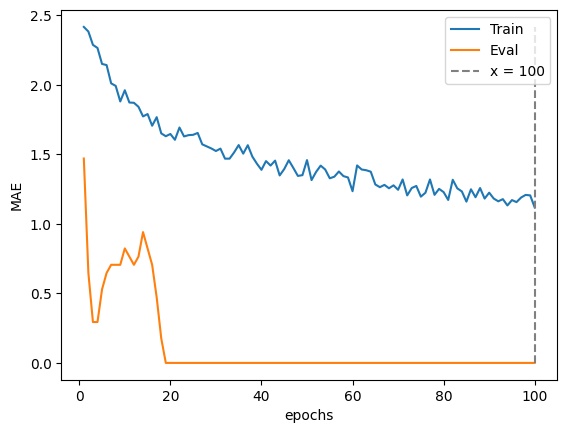

Epoch 001: | Train Loss: 4.31979 | Val Loss: 19.07692 | Train Acc: 1.305| Val Acc: 1.654
Epoch 002: | Train Loss: 3.58398 | Val Loss: 19.07692 | Train Acc: 1.170| Val Acc: 1.654
Epoch 003: | Train Loss: 4.15101 | Val Loss: 19.07692 | Train Acc: 1.278| Val Acc: 1.654
Epoch 004: | Train Loss: 3.98938 | Val Loss: 19.07692 | Train Acc: 1.246| Val Acc: 1.654
Epoch 005: | Train Loss: 3.92760 | Val Loss: 19.07692 | Train Acc: 1.230| Val Acc: 1.654
Epoch 006: | Train Loss: 3.54933 | Val Loss: 19.07692 | Train Acc: 1.192| Val Acc: 1.654
Epoch 007: | Train Loss: 4.23399 | Val Loss: 19.07692 | Train Acc: 1.256| Val Acc: 1.654
Epoch 008: | Train Loss: 4.04012 | Val Loss: 19.07692 | Train Acc: 1.238| Val Acc: 1.654
Epoch 009: | Train Loss: 4.01302 | Val Loss: 19.07692 | Train Acc: 1.216| Val Acc: 1.654
Epoch 010: | Train Loss: 3.48903 | Val Loss: 19.07692 | Train Acc: 1.127| Val Acc: 1.654
Epoch 011: | Train Loss: 3.35255 | Val Loss: 19.07692 | Train Acc: 1.119| Val Acc: 1.654
Epoch 012: | Train Lo

Epoch 095: | Train Loss: 2.09879 | Val Loss: 19.06054 | Train Acc: 0.896| Val Acc: 1.654
Epoch 096: | Train Loss: 2.14766 | Val Loss: 19.00473 | Train Acc: 0.889| Val Acc: 1.673
Epoch 097: | Train Loss: 2.23196 | Val Loss: 18.98077 | Train Acc: 0.932| Val Acc: 1.673
Epoch 098: | Train Loss: 2.06306 | Val Loss: 18.99577 | Train Acc: 0.855| Val Acc: 1.673
Epoch 099: | Train Loss: 2.04780 | Val Loss: 19.05935 | Train Acc: 0.899| Val Acc: 1.654
Epoch 100: | Train Loss: 2.15589 | Val Loss: 19.06244 | Train Acc: 0.950| Val Acc: 1.654


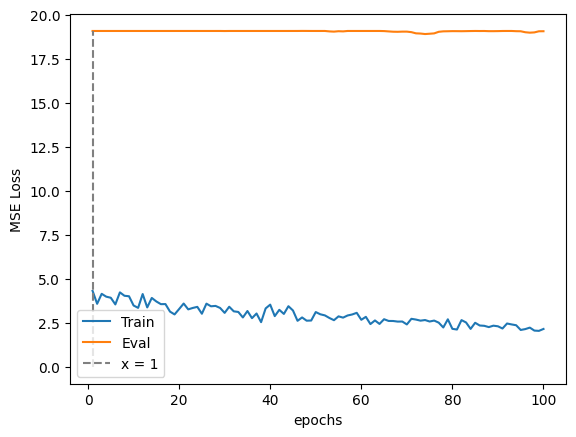

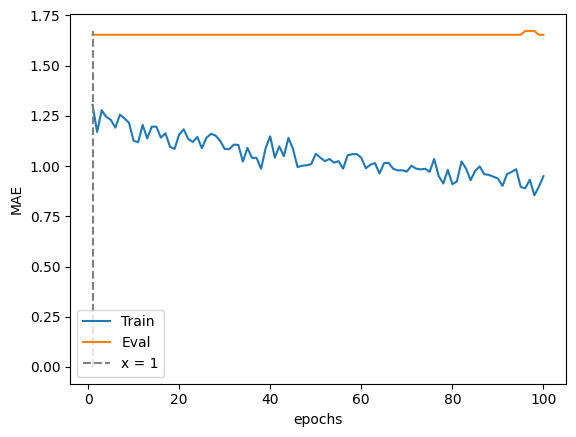

Epoch 001: | Train Loss: 4.22584 | Val Loss: 14.70129 | Train Acc: 1.205| Val Acc: 1.957
Epoch 002: | Train Loss: 4.18476 | Val Loss: 15.16464 | Train Acc: 1.228| Val Acc: 1.935
Epoch 003: | Train Loss: 3.66845 | Val Loss: 15.11224 | Train Acc: 1.071| Val Acc: 1.935
Epoch 004: | Train Loss: 3.19286 | Val Loss: 14.49461 | Train Acc: 1.071| Val Acc: 1.848
Epoch 005: | Train Loss: 3.45406 | Val Loss: 14.05635 | Train Acc: 1.036| Val Acc: 1.870
Epoch 006: | Train Loss: 3.84723 | Val Loss: 13.91220 | Train Acc: 1.173| Val Acc: 1.935
Epoch 007: | Train Loss: 3.73088 | Val Loss: 13.37183 | Train Acc: 1.084| Val Acc: 1.978
Epoch 008: | Train Loss: 3.25056 | Val Loss: 13.23045 | Train Acc: 1.084| Val Acc: 1.870
Epoch 009: | Train Loss: 3.55798 | Val Loss: 13.29115 | Train Acc: 1.103| Val Acc: 1.891
Epoch 010: | Train Loss: 3.31958 | Val Loss: 13.42145 | Train Acc: 1.061| Val Acc: 1.870
Epoch 011: | Train Loss: 3.20634 | Val Loss: 12.94818 | Train Acc: 1.077| Val Acc: 1.848
Epoch 012: | Train Lo

Epoch 094: | Train Loss: 2.11741 | Val Loss: 11.93231 | Train Acc: 0.848| Val Acc: 2.152
Epoch 095: | Train Loss: 1.91547 | Val Loss: 12.35549 | Train Acc: 0.819| Val Acc: 2.152
Epoch 096: | Train Loss: 2.09894 | Val Loss: 12.70980 | Train Acc: 0.870| Val Acc: 2.109
Epoch 097: | Train Loss: 1.92129 | Val Loss: 12.73579 | Train Acc: 0.815| Val Acc: 2.022
Epoch 098: | Train Loss: 1.82081 | Val Loss: 12.49140 | Train Acc: 0.805| Val Acc: 2.022
Epoch 099: | Train Loss: 1.84854 | Val Loss: 12.60300 | Train Acc: 0.798| Val Acc: 2.000
Epoch 100: | Train Loss: 1.61412 | Val Loss: 12.80878 | Train Acc: 0.790| Val Acc: 1.935


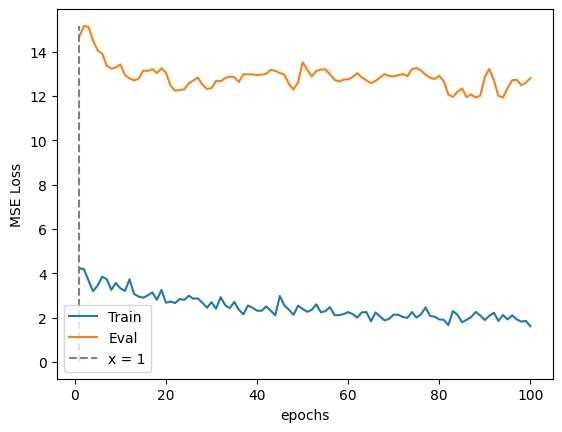

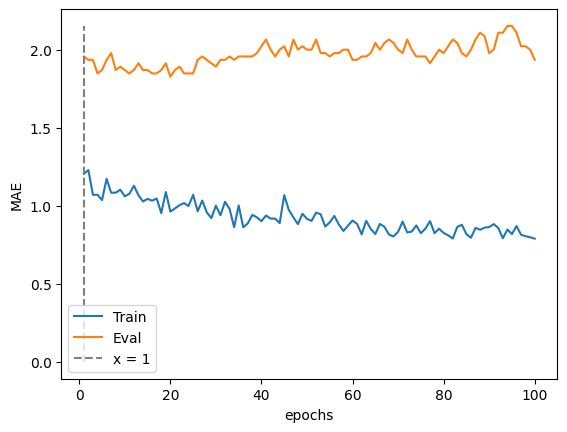

Epoch 001: | Train Loss: 3.71017 | Val Loss: 17.45942 | Train Acc: 1.111| Val Acc: 2.574
Epoch 002: | Train Loss: 3.19084 | Val Loss: 17.38966 | Train Acc: 1.030| Val Acc: 2.723
Epoch 003: | Train Loss: 3.12013 | Val Loss: 16.64500 | Train Acc: 1.023| Val Acc: 2.702
Epoch 004: | Train Loss: 2.70848 | Val Loss: 15.98511 | Train Acc: 0.957| Val Acc: 2.787
Epoch 005: | Train Loss: 3.09816 | Val Loss: 16.26117 | Train Acc: 1.078| Val Acc: 2.936
Epoch 006: | Train Loss: 3.05181 | Val Loss: 15.17544 | Train Acc: 1.067| Val Acc: 2.745
Epoch 007: | Train Loss: 2.62048 | Val Loss: 14.39066 | Train Acc: 0.989| Val Acc: 2.553
Epoch 008: | Train Loss: 2.55545 | Val Loss: 14.51939 | Train Acc: 0.987| Val Acc: 2.532
Epoch 009: | Train Loss: 2.63146 | Val Loss: 13.73913 | Train Acc: 0.993| Val Acc: 2.511
Epoch 010: | Train Loss: 2.83832 | Val Loss: 13.33722 | Train Acc: 1.032| Val Acc: 2.489
Epoch 011: | Train Loss: 2.85645 | Val Loss: 14.12375 | Train Acc: 1.044| Val Acc: 2.532
Epoch 012: | Train Lo

Epoch 097: | Train Loss: 1.53360 | Val Loss: 15.53209 | Train Acc: 0.773| Val Acc: 2.681
Epoch 098: | Train Loss: 1.40121 | Val Loss: 15.52942 | Train Acc: 0.720| Val Acc: 2.702
Epoch 099: | Train Loss: 1.82316 | Val Loss: 14.86322 | Train Acc: 0.798| Val Acc: 2.553
Epoch 100: | Train Loss: 1.49138 | Val Loss: 14.58492 | Train Acc: 0.763| Val Acc: 2.553


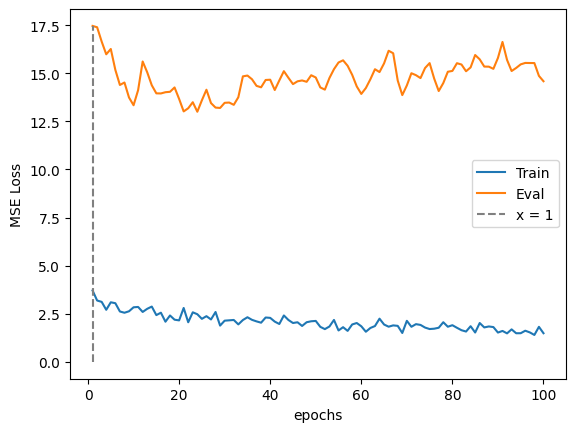

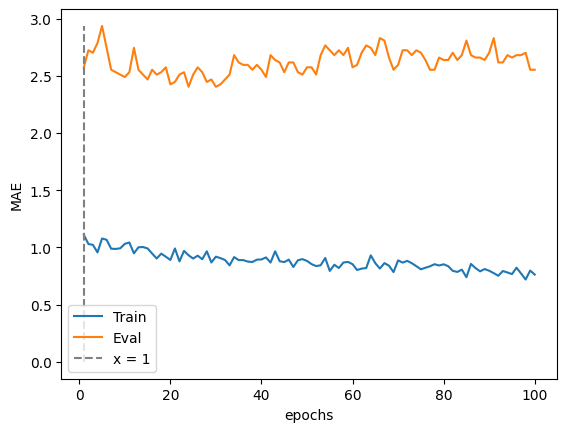

Epoch 001: | Train Loss: 3.22477 | Val Loss: 19.36251 | Train Acc: 1.021| Val Acc: 2.513
Epoch 002: | Train Loss: 2.57251 | Val Loss: 17.55328 | Train Acc: 0.934| Val Acc: 2.462
Epoch 003: | Train Loss: 2.59200 | Val Loss: 16.79206 | Train Acc: 0.944| Val Acc: 2.308
Epoch 004: | Train Loss: 2.68730 | Val Loss: 15.99651 | Train Acc: 0.966| Val Acc: 2.282
Epoch 005: | Train Loss: 2.33262 | Val Loss: 15.52124 | Train Acc: 0.929| Val Acc: 2.231
Epoch 006: | Train Loss: 2.26753 | Val Loss: 14.95433 | Train Acc: 0.922| Val Acc: 2.256
Epoch 007: | Train Loss: 2.32885 | Val Loss: 14.50401 | Train Acc: 0.918| Val Acc: 2.282
Epoch 008: | Train Loss: 2.08354 | Val Loss: 14.58516 | Train Acc: 0.877| Val Acc: 2.256
Epoch 009: | Train Loss: 2.19066 | Val Loss: 14.82865 | Train Acc: 0.901| Val Acc: 2.231
Epoch 010: | Train Loss: 1.94585 | Val Loss: 14.59625 | Train Acc: 0.852| Val Acc: 2.231
Epoch 011: | Train Loss: 1.99693 | Val Loss: 14.77708 | Train Acc: 0.904| Val Acc: 2.282
Epoch 012: | Train Lo

Epoch 095: | Train Loss: 1.57692 | Val Loss: 14.89324 | Train Acc: 0.745| Val Acc: 2.590
Epoch 096: | Train Loss: 1.40866 | Val Loss: 14.49471 | Train Acc: 0.752| Val Acc: 2.513
Epoch 097: | Train Loss: 1.61704 | Val Loss: 14.39588 | Train Acc: 0.729| Val Acc: 2.564
Epoch 098: | Train Loss: 1.25974 | Val Loss: 14.55807 | Train Acc: 0.709| Val Acc: 2.564
Epoch 099: | Train Loss: 1.34377 | Val Loss: 14.85800 | Train Acc: 0.724| Val Acc: 2.538
Epoch 100: | Train Loss: 1.34638 | Val Loss: 15.26364 | Train Acc: 0.689| Val Acc: 2.590


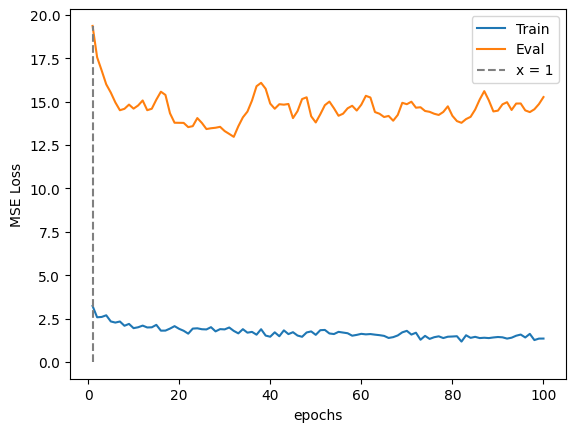

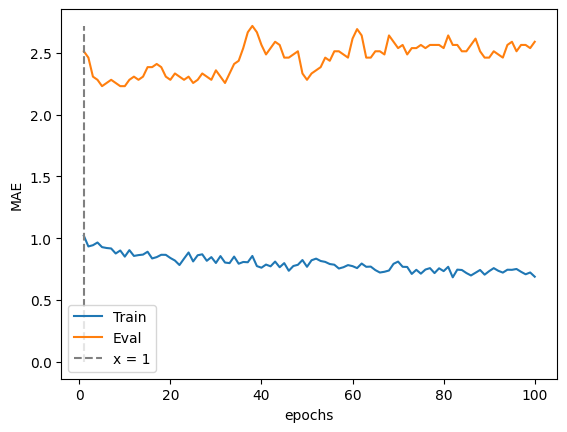

Epoch 001: | Train Loss: 3.42966 | Val Loss: 53.96304 | Train Acc: 1.027| Val Acc: 4.486
Epoch 002: | Train Loss: 2.67459 | Val Loss: 53.54362 | Train Acc: 0.947| Val Acc: 4.378
Epoch 003: | Train Loss: 2.59070 | Val Loss: 53.25584 | Train Acc: 0.927| Val Acc: 4.405
Epoch 004: | Train Loss: 2.57439 | Val Loss: 52.65222 | Train Acc: 0.917| Val Acc: 4.378
Epoch 005: | Train Loss: 2.61450 | Val Loss: 51.44502 | Train Acc: 0.957| Val Acc: 4.270
Epoch 006: | Train Loss: 2.25787 | Val Loss: 51.38126 | Train Acc: 0.904| Val Acc: 4.297
Epoch 007: | Train Loss: 2.42083 | Val Loss: 52.22485 | Train Acc: 0.898| Val Acc: 4.297
Epoch 008: | Train Loss: 2.22219 | Val Loss: 52.47283 | Train Acc: 0.913| Val Acc: 4.297
Epoch 009: | Train Loss: 2.46712 | Val Loss: 52.85936 | Train Acc: 0.938| Val Acc: 4.270
Epoch 010: | Train Loss: 2.28612 | Val Loss: 52.74415 | Train Acc: 0.888| Val Acc: 4.297
Epoch 011: | Train Loss: 2.00325 | Val Loss: 52.71157 | Train Acc: 0.876| Val Acc: 4.270
Epoch 012: | Train Lo

Epoch 096: | Train Loss: 1.49685 | Val Loss: 52.52039 | Train Acc: 0.725| Val Acc: 4.297
Epoch 097: | Train Loss: 1.49494 | Val Loss: 52.29903 | Train Acc: 0.757| Val Acc: 4.243
Epoch 098: | Train Loss: 1.32692 | Val Loss: 53.38491 | Train Acc: 0.734| Val Acc: 4.405
Epoch 099: | Train Loss: 1.27302 | Val Loss: 53.72856 | Train Acc: 0.714| Val Acc: 4.486
Epoch 100: | Train Loss: 1.35099 | Val Loss: 52.27475 | Train Acc: 0.705| Val Acc: 4.324


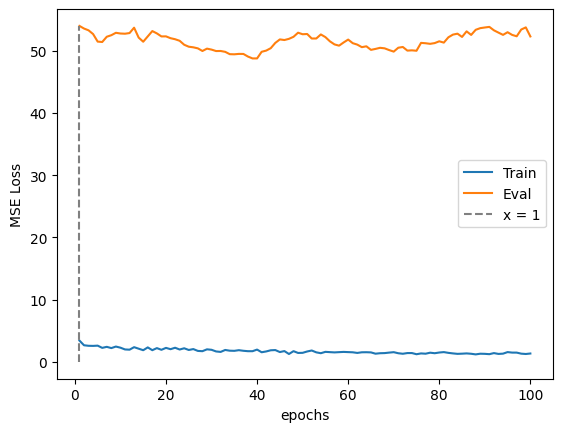

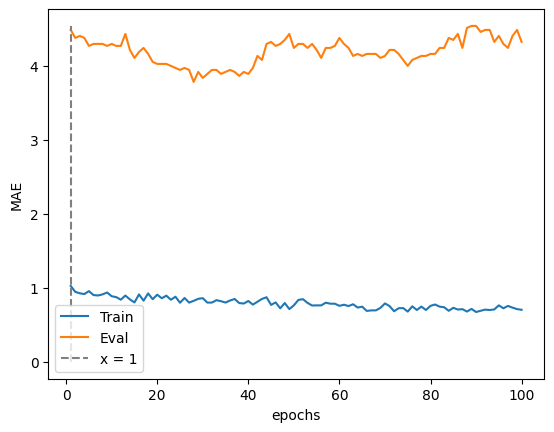

Epoch 001: | Train Loss: 3.06107 | Val Loss: 18.37023 | Train Acc: 1.002| Val Acc: 3.429
Epoch 002: | Train Loss: 3.07240 | Val Loss: 14.34117 | Train Acc: 1.025| Val Acc: 3.000
Epoch 003: | Train Loss: 2.60819 | Val Loss: 14.28636 | Train Acc: 0.952| Val Acc: 3.286
Epoch 004: | Train Loss: 2.48327 | Val Loss: 17.34931 | Train Acc: 0.917| Val Acc: 3.286
Epoch 005: | Train Loss: 2.47781 | Val Loss: 17.65930 | Train Acc: 0.930| Val Acc: 3.429
Epoch 006: | Train Loss: 2.44946 | Val Loss: 16.91972 | Train Acc: 0.904| Val Acc: 3.429
Epoch 007: | Train Loss: 2.51498 | Val Loss: 16.82462 | Train Acc: 0.919| Val Acc: 3.286
Epoch 008: | Train Loss: 2.73038 | Val Loss: 18.80151 | Train Acc: 0.955| Val Acc: 3.286
Epoch 009: | Train Loss: 2.22577 | Val Loss: 17.39727 | Train Acc: 0.878| Val Acc: 3.429
Epoch 010: | Train Loss: 2.16322 | Val Loss: 13.90426 | Train Acc: 0.894| Val Acc: 3.000
Epoch 011: | Train Loss: 2.24664 | Val Loss: 13.18132 | Train Acc: 0.897| Val Acc: 3.000
Epoch 012: | Train Lo

Epoch 094: | Train Loss: 1.27711 | Val Loss: 26.73088 | Train Acc: 0.708| Val Acc: 4.143
Epoch 095: | Train Loss: 1.24062 | Val Loss: 27.49542 | Train Acc: 0.691| Val Acc: 4.429
Epoch 096: | Train Loss: 1.25928 | Val Loss: 25.32558 | Train Acc: 0.682| Val Acc: 4.143
Epoch 097: | Train Loss: 1.22564 | Val Loss: 20.64798 | Train Acc: 0.714| Val Acc: 3.714
Epoch 098: | Train Loss: 1.23516 | Val Loss: 21.19231 | Train Acc: 0.709| Val Acc: 3.571
Epoch 099: | Train Loss: 1.17048 | Val Loss: 24.33426 | Train Acc: 0.691| Val Acc: 4.143
Epoch 100: | Train Loss: 1.16597 | Val Loss: 25.14388 | Train Acc: 0.681| Val Acc: 4.143


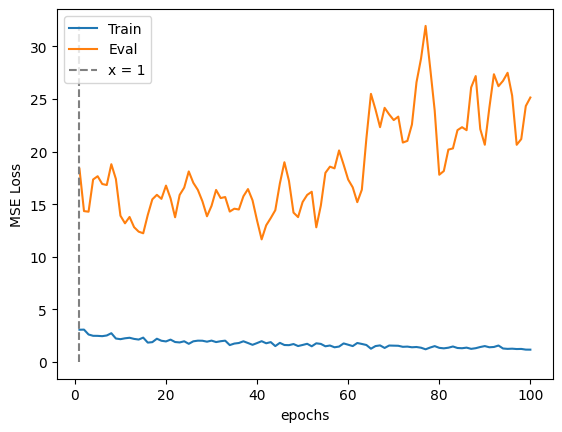

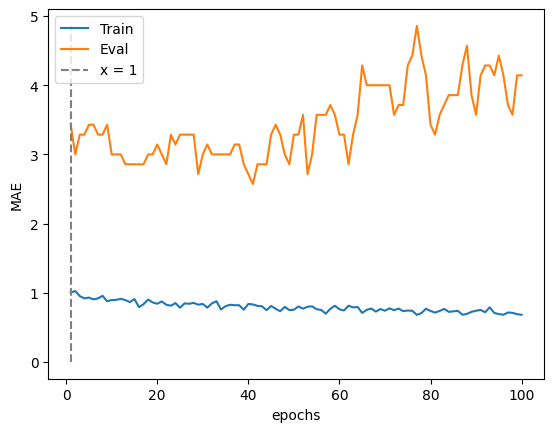

MAE on train set:  0.5826296743063932
min prediction: 0
max prediction: 17

MAE on test set:  2.3877551020408165
Error <= 30: 100.00 %
min prediction: 0
max prediction: 12


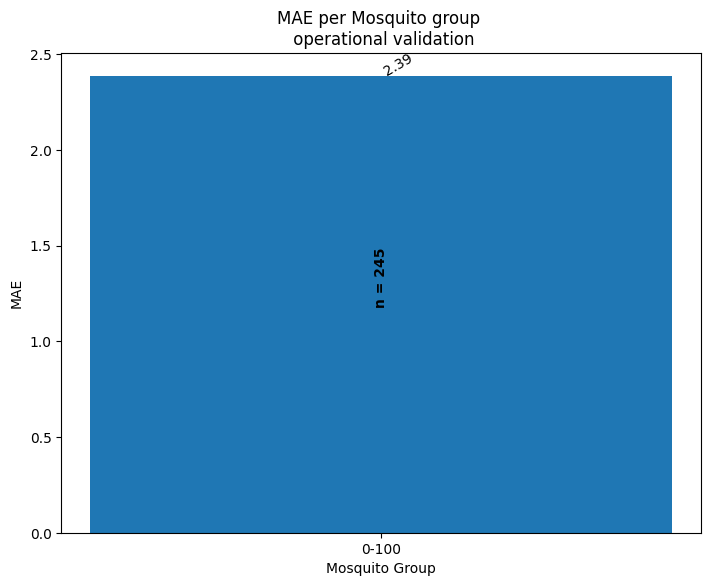

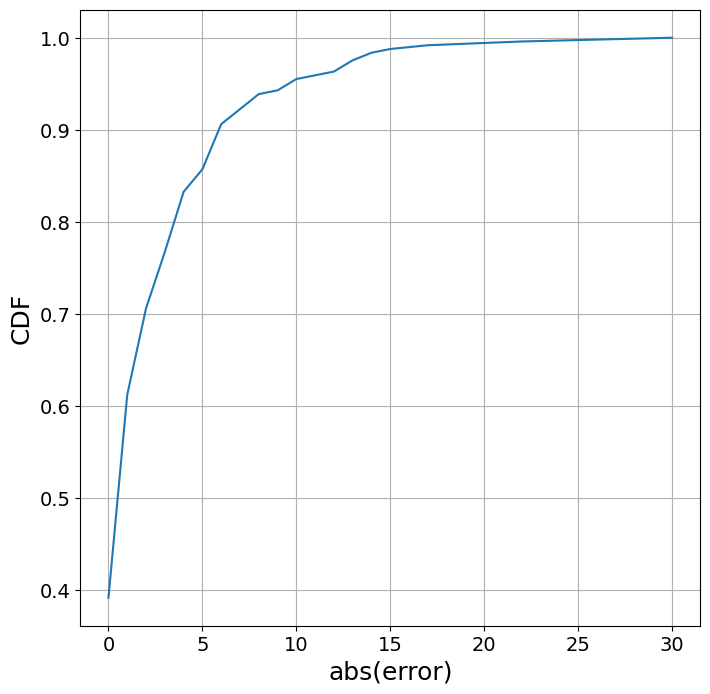

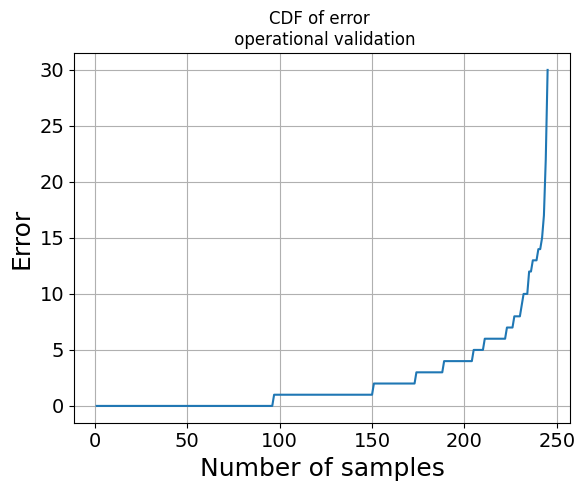

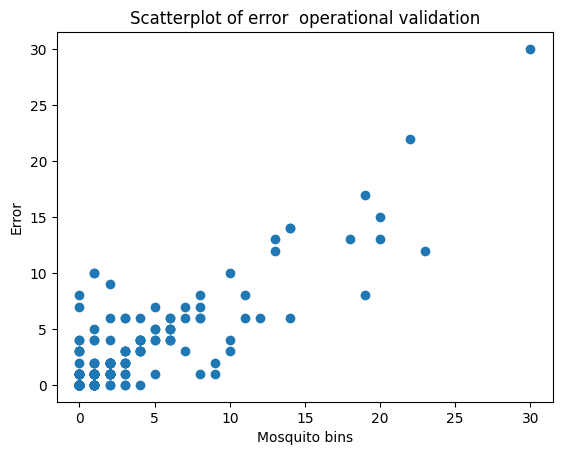

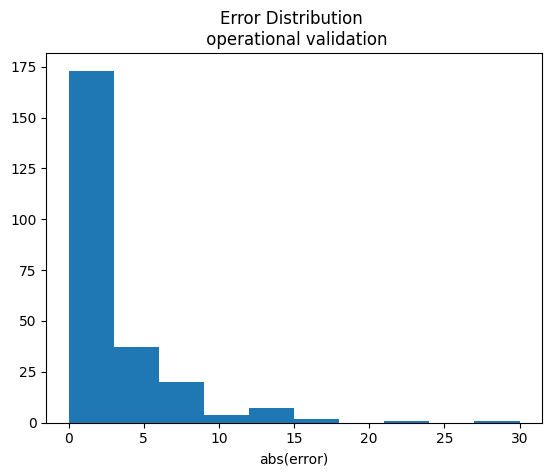

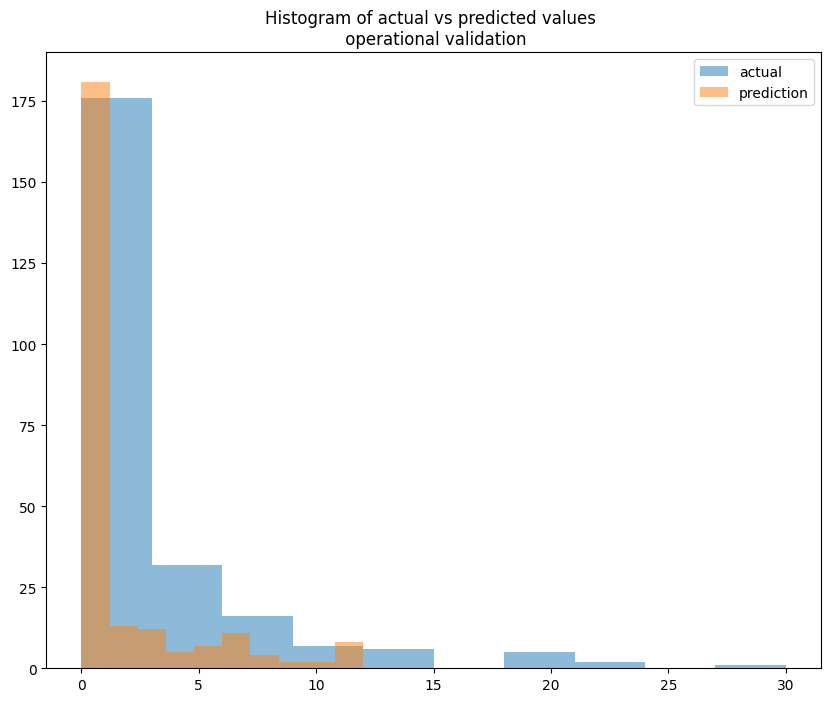

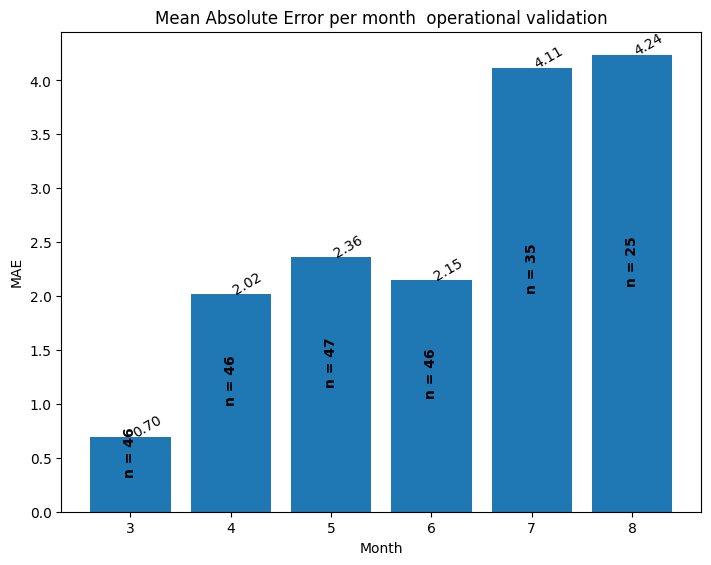

In [10]:
operational_validation(data, model, date='2022-01-01', filepath ='', date_col='dt_placement', case='', fi=False, export=False)